In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
link = pd.read_csv('links.csv')
movie=pd.read_csv('movies.csv')
rating=pd.read_csv('ratings.csv')
tag=pd.read_csv('tags.csv')


# What is the shape of "movies.csv"?


In [3]:
movie.shape

(9742, 3)

# What is the shape of "ratings.csv"?

In [4]:
rating.shape

(100836, 4)

# How many unique "userId" are available in "ratings.csv"?


In [5]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [6]:
rating['userId'].nunique()

610

# Merging

In [7]:
df=pd.merge(movie,rating,on='movieId')

In [8]:
df=pd.merge(df,link,on='movieId')

In [9]:
df=pd.merge(df,tag,on='movieId')

In [10]:
df

,movieId,title,genres,userId_x,rating,timestamp_x,imdbId,tmdbId,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,3778644,348350.0,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,184,gintama,1537098603


In [11]:
df.rename({'userId_x':'rat_userId','timestamp_x':'rat_timestamp','userId_y':'tag_userId','timestamp_y':'tag_timestamp'},axis=1,inplace=True)

In [12]:
df

,movieId,title,genres,rat_userId,rating,rat_timestamp,imdbId,tmdbId,tag_userId,tag,tag_timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,3778644,348350.0,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,184,gintama,1537098603


In [13]:
df.isnull().sum()

movieId          0
title            0
genres           0
rat_userId       0
rating           0
rat_timestamp    0
imdbId           0
tmdbId           0
tag_userId       0
tag              0
tag_timestamp    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movieId        233213 non-null  int64  
 1   title          233213 non-null  object 
 2   genres         233213 non-null  object 
 3   rat_userId     233213 non-null  int64  
 4   rating         233213 non-null  float64
 5   rat_timestamp  233213 non-null  int64  
 6   imdbId         233213 non-null  int64  
 7   tmdbId         233213 non-null  float64
 8   tag_userId     233213 non-null  int64  
 9   tag            233213 non-null  object 
 10  tag_timestamp  233213 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 19.6+ MB


In [15]:
df.describe()

,movieId,rat_userId,rating,rat_timestamp,imdbId,tmdbId,tag_userId,tag_timestamp
count,233213.000000,233213.000000,233213.000000,2.332130e+05,2.332130e+05,233213.000000,233213.000000,2.332130e+05
mean,12319.999443,309.688191,3.966535,1.213524e+09,2.610632e+05,9378.277742,470.683564,1.384774e+09
std,28243.919401,178.206387,0.968637,2.250448e+08,4.414411e+05,36943.139800,153.329632,1.534621e+08
min,1.000000,1.000000,0.500000,8.281246e+08,1.234900e+04,11.000000,2.000000,1.137179e+09
25%,296.000000,156.000000,3.500000,1.017365e+09,1.103570e+05,278.000000,424.000000,1.242494e+09
50%,1198.000000,309.000000,4.000000,1.217325e+09,1.109120e+05,680.000000,477.000000,1.457901e+09
75%,4638.000000,460.000000,5.000000,1.443201e+09,1.724950e+05,1892.000000,599.000000,1.498457e+09
max,193565.000000,610.000000,5.000000,1.537799e+09,5.580390e+06,503475.000000,610.000000,1.537099e+09


# Which movie has received maximum number of user ratings?


In [16]:
df.groupby(['movieId','title'])['rat_userId'].count().sort_values(ascending=False).reset_index()

,movieId,title,rat_userId
0,296,Pulp Fiction (1994),55567
1,2959,Fight Club (1999),11772
2,260,Star Wars: Episode IV - A New Hope (1977),6526
3,293,Léon: The Professional (a.k.a. The Professiona...,4655
4,924,2001: A Space Odyssey (1968),4469
...,...,...,...
1549,5088,"Going Places (Valseuses, Les) (1974)",1
1550,31903,Zelary (2003),1
1551,3951,Two Family House (2000),1
1552,7049,Flying Down to Rio (1933),1


In [17]:
sf=pd.merge(movie,rating,on='movieId')

In [18]:
sf.groupby(['movieId','title'])['userId'].count().sort_values(ascending=False).reset_index().iloc[0]

movieId                    356
title      Forrest Gump (1994)
userId                     329
Name: 0, dtype: object

# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [19]:
df.loc[df['title']=='Matrix, The (1999)','tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [20]:
df[df['title']=='Terminator 2: Judgment Day (1991)']['rating'].mean()

3.970982142857143

# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

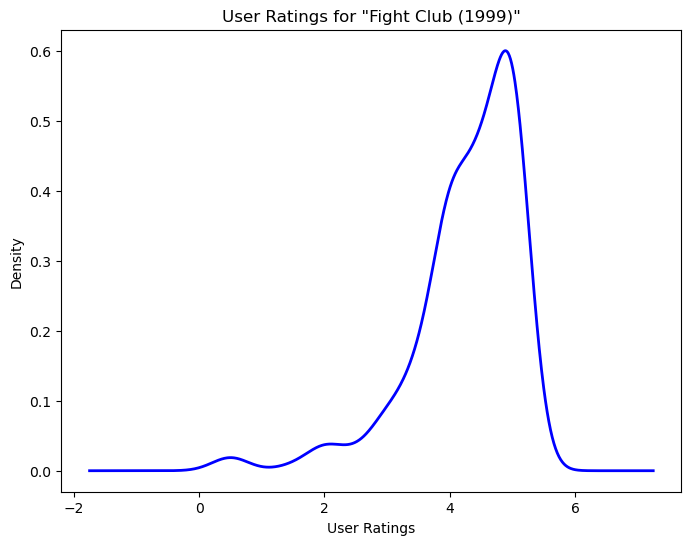

In [21]:
data = {'user_rating':list(sf.loc[sf['title']=='Fight Club (1999)','rating'])}
ratings_df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
ratings_df['user_rating'].plot(kind='kde', color='blue', linewidth=2)

plt.title('User Ratings for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Density')

plt.show()

### Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

# Which movie is the most popular based on  average user ratings?


In [22]:
gf = rating.groupby('movieId')['rating'].agg(['count', 'mean'])
merged = pd.merge(movie, gf, on='movieId', how='inner')
filtered = merged[merged['count'] > 50]


In [23]:
filtered.groupby(['title','movieId'])['mean'].max().sort_values(ascending=False).reset_index().iloc[0]

title      Shawshank Redemption, The (1994)
movieId                                 318
mean                               4.429022
Name: 0, dtype: object

# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [24]:
filtered.groupby('title')['count'].max().sort_values(ascending=False).reset_index().head()

,title,count
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [25]:
filtered['sci']=filtered['genres'].apply(lambda x:"".join(re.findall(r'Sci-Fi',x)))

In [26]:
s=filtered[filtered['sci']=='Sci-Fi'] 

In [27]:
s.groupby(['title','movieId'])['count'].max().sort_values(ascending=False).reset_index().iloc[2]

title      Jurassic Park (1993)
movieId                     480
count                       238
Name: 2, dtype: object

### You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [56]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
        
    return imdb_rating.text.strip() if imdb_rating else np.nan


In [65]:
import requests
import numpy as np
from bs4 import BeautifulSoup
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt%7Bnew_id%7D/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}    
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

# Mention the movieId of the movie which has the highest IMDB rating

In [ ]:
imdb_ratings=[]
for i in link['imdbId']:
    imdb_ratings.append(scrapper(i))

# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating